# Домашнее задание «Деревья решений»

## Задание

**Цель: изучить применение дерева решений в рамках задачи регрессии**

**Описание задания:**

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

## Этапы работы:

In [192]:
import numpy as np
import pandas as pd

### 1. Получите данные и загрузите их в рабочую среду

In [193]:
from sklearn import datasets
print(datasets.fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [194]:
data = datasets.fetch_california_housing(as_frame=True).frame

### 2. Проведите первичный анализ.

In [195]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##### Важные характерисики датасета:
:Количество экземпляров: 20640

:Количество атрибутов: 8 числовых, предиктивные атрибуты и цель (MedHouseVal)

:Информация об атрибутах:

- MedInc        средний доход в блок-группе
- HouseAge      cредний возраст дома в блочной группе
- AveRooms      среднее количество комнат на домохозяйство
- AveBedrms     cреднее количество спален на домохозяйство
- Population    население блок-группы
- AveOccup      среднее количество членов домохозяйства 
- Latitude      широта блок-группы
- Longitude     долгота блок-группы

: Отсутствующие значения атрибутов: нет


#### a. Проверьте данные на пропуски. Удалите в случае обнаружения.

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### b.*Нормализуйте один из признаков.

In [197]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

Распределение всех признаков:

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

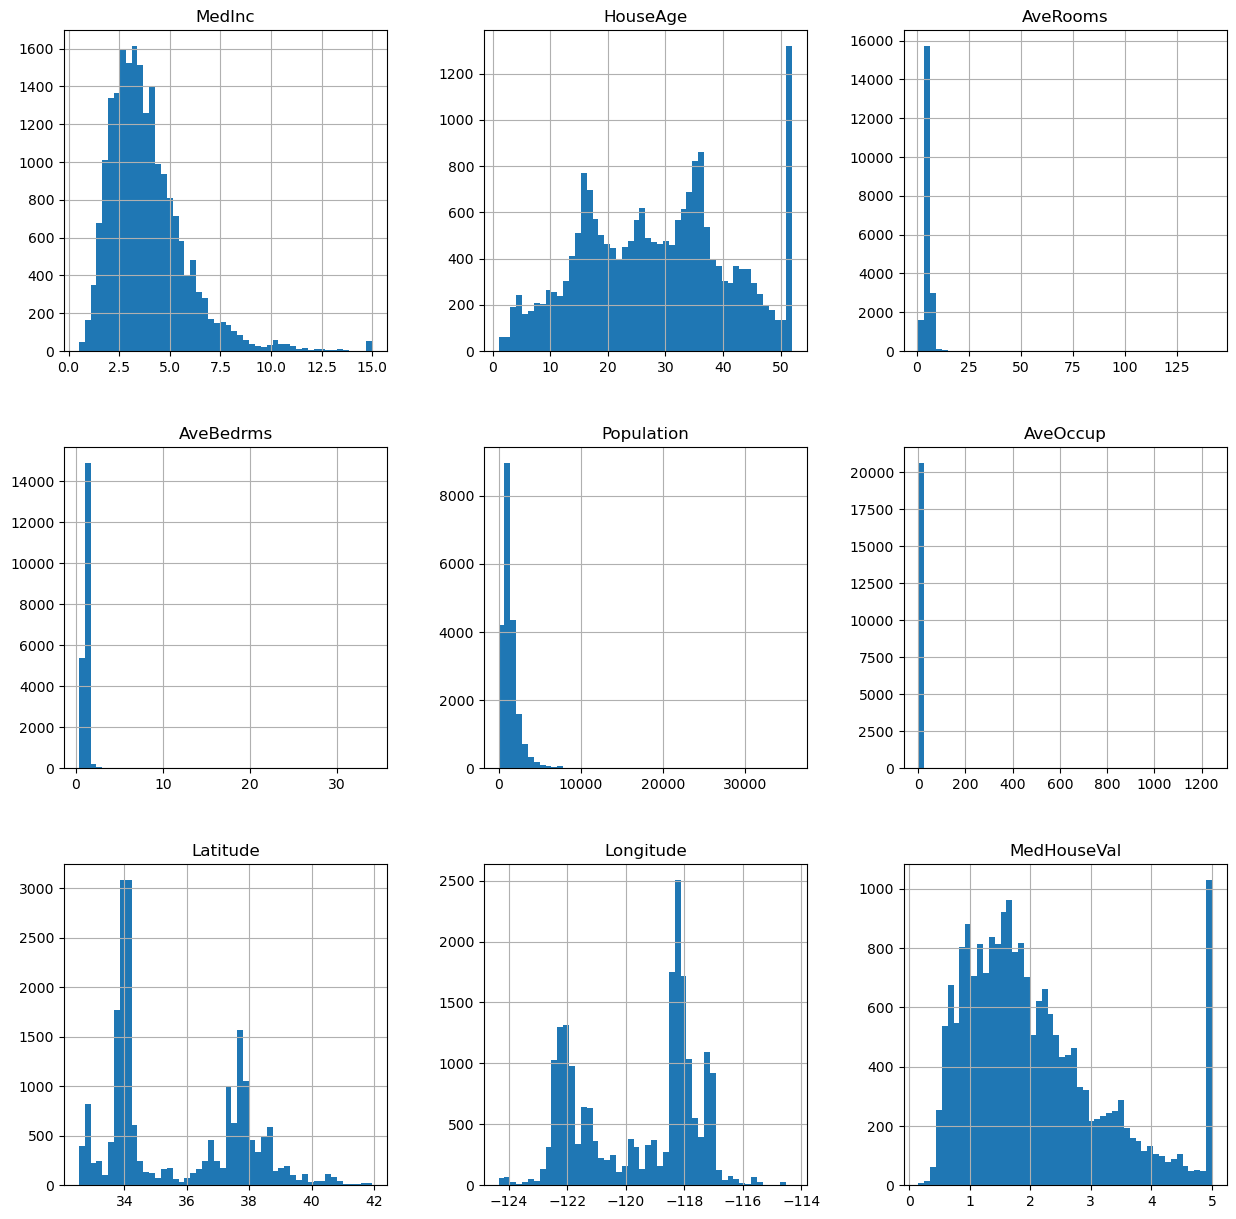

In [198]:
data.hist(figsize=(15, 15), bins=50)

Самый "сложный" признак - 'HouseAge', у него присутствует большой выброс, а так же 2 медианы

In [199]:
data['HouseAge'] = np.log(data['HouseAge'])

<AxesSubplot:ylabel='Frequency'>

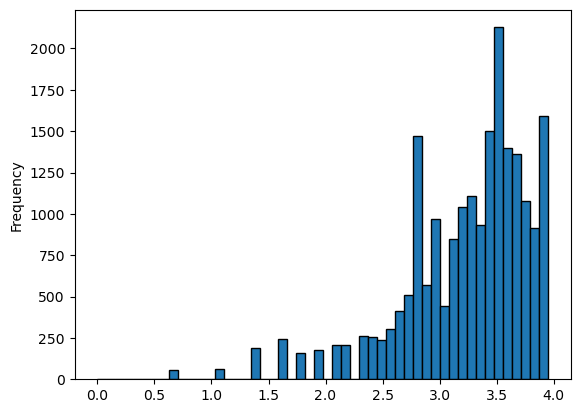

In [200]:
data['HouseAge'].plot(kind='hist', bins=50, edgecolor ='black')

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data[['MedHouseVal']]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Обучите модель регрессии на обучающем множестве.

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. 
Для этого используйте встроенную функцию score.

In [206]:
from sklearn.metrics import r2_score

In [207]:
y_test_pred_1 = model.predict(X_test)

In [208]:
r2_test_1 = r2_score(y_test, y_test_pred_1)
print(f'\nТочность предсказания линейной модели:', round(r2_test_1, 3))


Точность предсказания линейной модели: 0.592


### 6. Обучите дерево решений на обучающем множестве.

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
clf = DecisionTreeRegressor()

In [211]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

#### a. Повторите п. 5 для полученной модели.

In [212]:
y_test_pred_2 = clf.predict(X_test)
r2_test_2 = r2_score(y_test, y_test_pred_2)
print(f'\nТочность предсказания дерева решений:', round(r2_test_2, 3))


Точность предсказания дерева решений: 0.58


#### b. Визуализируйте часть дерева решений. 
Убедитесь, что график получился читабельным. 

In [213]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'MedInc <= 5.029\nsquared_error = 1.338\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.7, 'MedInc <= 3.074\nsquared_error = 0.833\nsamples = 12979\nvalue = 1.733'),
 Text(0.125, 0.5, 'AveRooms <= 4.314\nsquared_error = 0.545\nsamples = 6272\nvalue = 1.35'),
 Text(0.0625, 0.3, 'MedInc <= 2.215\nsquared_error = 0.651\nsamples = 2630\nvalue = 1.613'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'MedInc <= 2.415\nsquared_error = 0.383\nsamples = 3642\nvalue = 1.16'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'AveOccup <= 2.373\nsquared_error = 0.836\nsamples = 6707\nvalue = 2.092'),
 Text(0.3125, 0.3, 'HouseAge <= 3.068\nsquared_error = 1.281\nsamples = 1574\nvalue = 2.792'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'MedInc <= 4.071\nsquared_error = 0.503\nsamples = 5133\nvalue = 1.877'),
 Text(0.40625, 0.1, '\n  (...

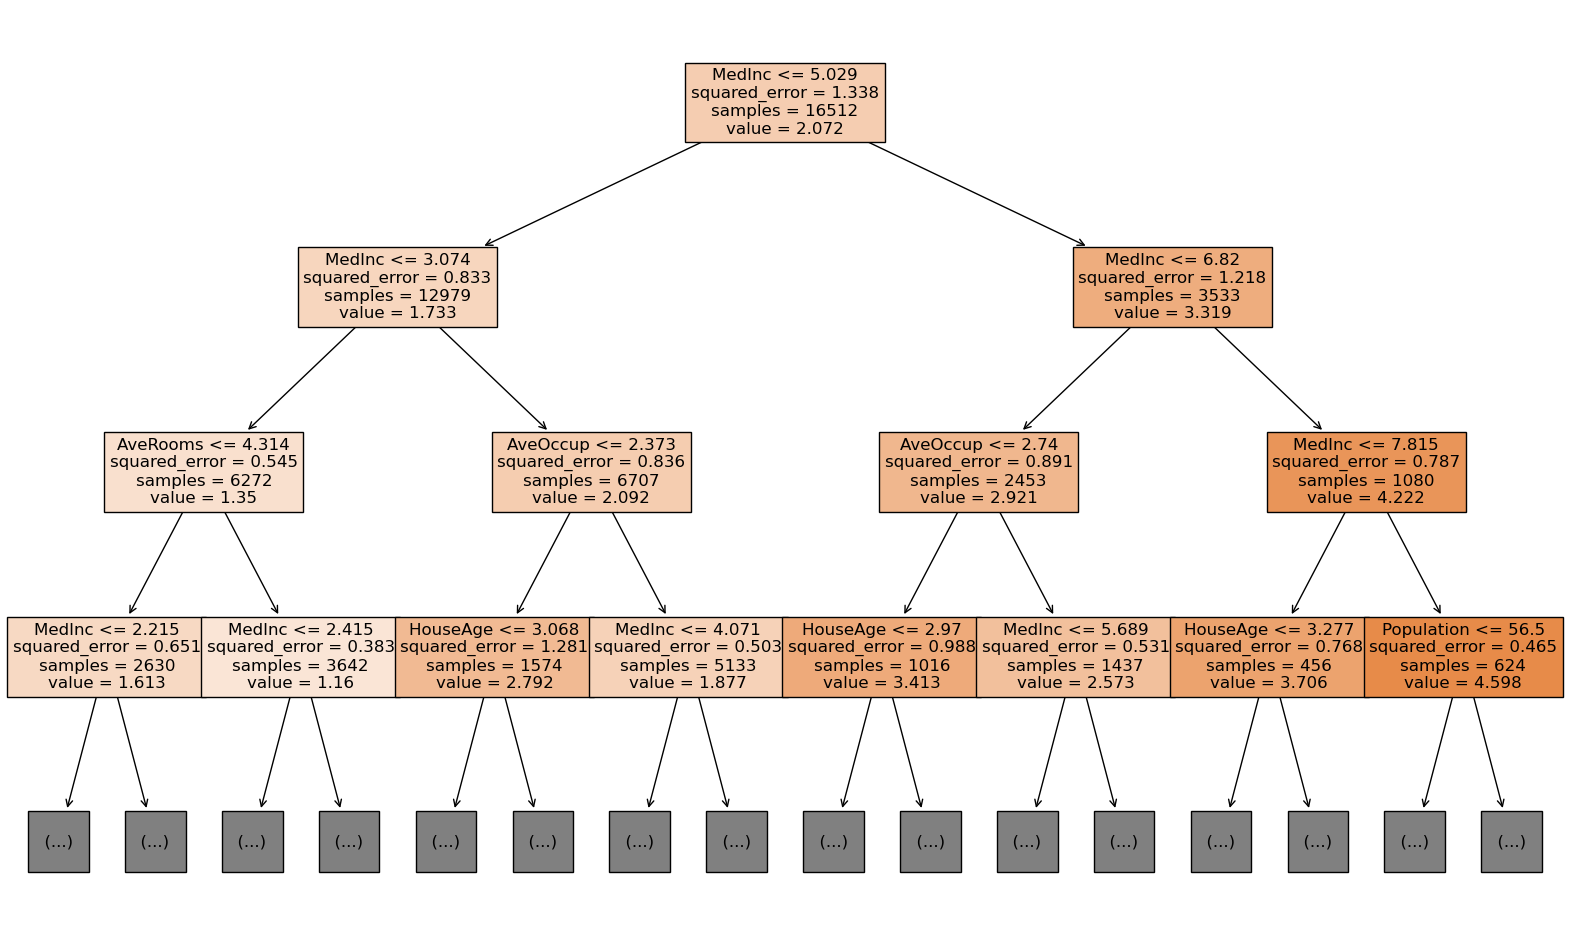

In [214]:
plt.figure(figsize=(20,12))

MAX_DEPTH = 3
plot_tree(clt, max_depth=MAX_DEPTH, feature_names=X.columns, filled=True, fontsize=12)

### 7. Оптимизируйте глубину дерева (max_depth). 

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
MAX_DEPTH_RANGE = range(1, 20)

##### *Оптимизируйте ещё один параметр модели на выбор.

In [217]:
# min_samples_leaf
OTHER_PARAM_RANGE = range(1, 20)

In [218]:
# сетка параметров
param_grid = {'max_depth': MAX_DEPTH_RANGE, 'min_samples_leaf': OTHER_PARAM_RANGE}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20)})

In [219]:
print('Лучшие параметры:', grid_search.best_params_)

Лучшие параметры: {'max_depth': 15, 'min_samples_leaf': 16}


In [220]:
MD = grid_search.best_params_['max_depth']
MS = grid_search.best_params_['min_samples_leaf']

#### a. Повторите п. 5 для полученной модели.

In [221]:
clf_new = DecisionTreeRegressor(max_depth=MD, min_samples_leaf=MS)

In [222]:
clf_new.fit(X_train, y_train)
y_test_pred_3 = clf_new.predict(X_test)
r2_test_3 = r2_score(y_test, y_test_pred_3)
print(f'\nТочность предсказания оптимизированного дерева решений:', round(r2_test_3, 3))


Точность предсказания оптимизированного дерева решений: 0.718


### 8. Сформулируйте выводы по проделанной работе.

    a. Сравните точность двух моделей.
    b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

##### Результат: получены знания по работе с деревом решений

|Модель| Точность предсказания |
|:---|---:|
| Линейная модель | 0.592|
| Дерево решений | 0.586
| Оптимизированное дерево решений | 0.718

Лучше всего себя показала модель оптимизированного дерева решений. Ее серьезный недостаток - она состоит из двух моделей, соответственно, она дольше обучается и требует больше ресурсов.

Дерево решений:

\- нуждается в подборе пареметров

\- дольше обучается

\- плохо справляется с новым диапазоном значений

\+ качество предсказаний выше в диапазоне обучающей выборки

\+ формирует четкие рамки

Дерево решений, определенно, больше подходит для решения задач классификации